In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from os import sys

In [2]:
sys.path.append('../')
import gridemic

In [3]:
R_zero = []
final_infected_ratio = []

for prob_trans in np.linspace(0.05, 0.15, 21): 

    SIR = gridemic.Model(seed_random = 1, N = 1000, 
                         tauS = 1.0 * prob_trans, etaS = 0.5 * prob_trans, 
                         prob_symptom = 1.0, kEI = 1e-9, test_begin=1e99)
    
    basic_reproduction_number = SIR.reproduction_number()

    population = SIR.simulate(NTime = 10000)

    final_infected_ratio.append(np.sum(population[SIR.time - 1, 1:5]) 
                             / (SIR.N) ** 2)
    R_zero.append(basic_reproduction_number)

Text(0, 0.5, 'Final infected ratio')

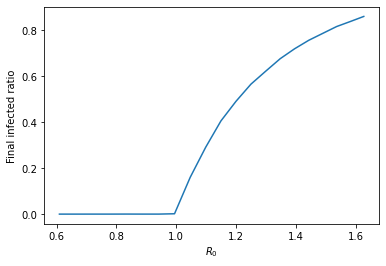

In [4]:
plt.plot(R_zero, final_infected_ratio)
plt.xlabel("$R_0$")
plt.ylabel("Final infected ratio")

In [5]:
help(SIR.reproduction_number)

Help on method reproduction_number in module gridemic:

reproduction_number() method of gridemic.Model instance
    Computes and returns the basic reproduction number for model 
    parameters. 
    
    Parameters
    ----------
    z : float
        average number of susceptible neighbors / infectious

